In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data_url = 'https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_FY2023_Q4.xlsx'
df = pd.read_excel(data_url)

In [3]:
# Add extra data
df['DECISION_TIME'] = df['DECISION_DATE'] - df['RECEIVED_DATE']

In [6]:
# Filter the appeal case, assuming that the audit case is the case that has a decision time of more than 365 days
days_audit = 496
df_audit = df[df['DECISION_TIME'] > pd.Timedelta(days=days_audit)]
df_audit = df_audit[df_audit['DECISION_TIME'] < pd.Timedelta(days=days_audit*1.5)]
df_audit = df_audit[~df_audit['CASE_STATUS'].isin(['Certified-Expired', 'Withdrawn'])]
df_audit

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,DECISION_TIME
692,A-21025-45354,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
693,A-21025-45403,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
1480,A-21106-75277,Denied,2021-05-04,2022-10-05,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,Y,N,Faraz Qaisrani,Associate Attorney,GoogleDOL@balglobal.com,Victoria Cheng,Global Mobility Immigration,519 days
2723,A-21070-60921,Denied,2021-05-06,2022-10-07,N,NaT,NaN,N,DTCP USA LLC,2735 Sand Hill Road,...,N,N,Y,N,Hilla R NATTIV,Attorney,nattiv@bayareaimmigration.com,Jack YOUNG,Head of Ventures,519 days
2744,A-21141-90525,Denied,2021-05-21,2022-10-07,N,NaT,NaN,N,MedCapital Solutions LLC,"714 West Olympic Boulevard,",...,N,N,N,N,NATHAN K WEI,ATTORNEY,NATHAN@SGWLAWYERS.COM,JOHN EMRANI,MANAGER,504 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116336,A-22110-43558,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days
116337,A-22110-43569,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days
116338,A-22110-43575,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days
116339,A-22110-43580,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days


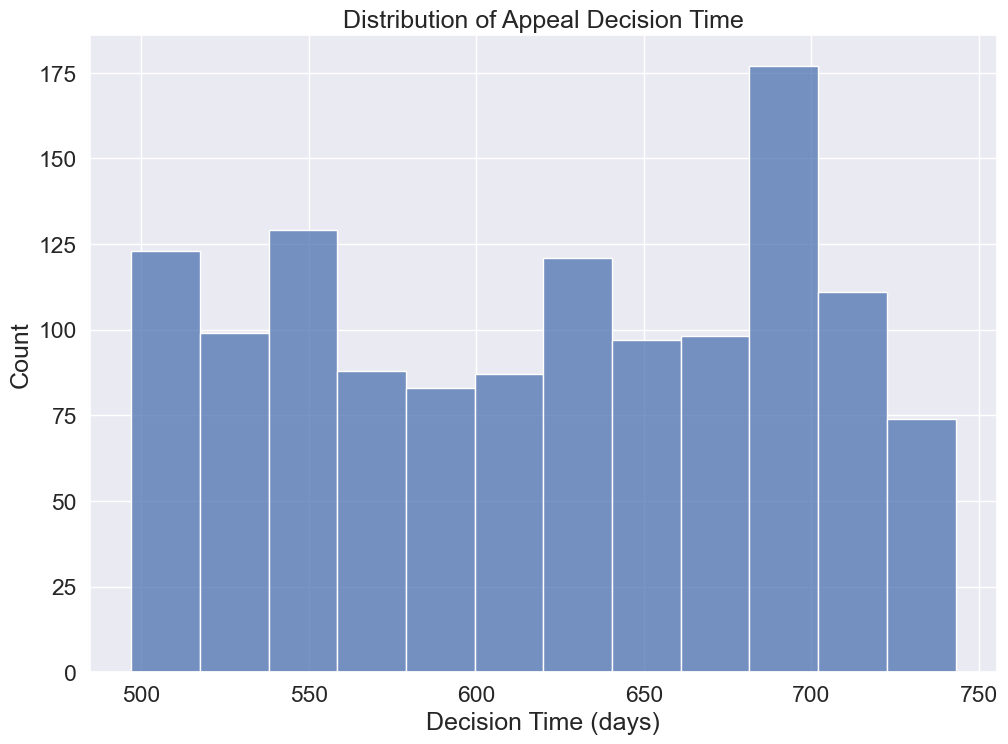

In [7]:
# Visualise the histogram distribution audt decision time
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
ax = sns.histplot(x=df_audit['DECISION_TIME'].dt.days)
ax.set(xlabel='Decision Time (days)', title='Distribution of Appeal Decision Time')
plt.show()

In [8]:
df_audit[['CASE_STATUS', 'DECISION_TIME']].groupby('CASE_STATUS').describe()

DECISION_TIME                               \
                    count                         mean   
CASE_STATUS                                              
Certified             453  645 days 19:52:03.178807944   
Denied                834  605 days 07:06:28.489208632   

                                                                               \
                                    std                min                25%   
CASE_STATUS                                                                     
Certified    63 days 23:43:35.143350909  497 days 00:00:00  592 days 00:00:00   
Denied       70 days 20:38:09.772985689  497 days 00:00:00  540 days 00:00:00   

                                                                      
                           50%                75%                max  
CASE_STATUS                                                           
Certified    651 days 00:00:00  702 days 00:00:00  743 days 00:00:00  
Denied       605 days 00:00:00  680 days 00:00:00  742 days 00:00:00

In [9]:
res = df_audit[['CASE_STATUS', 'DECISION_TIME']].groupby('CASE_STATUS').describe()['DECISION_TIME']['count']
#get approval rate
approval_rate = res['Certified'] / (res['Certified'] + res['Denied'])
print(f'Approval rate {approval_rate:.2%}')


Approval rate 35.20%


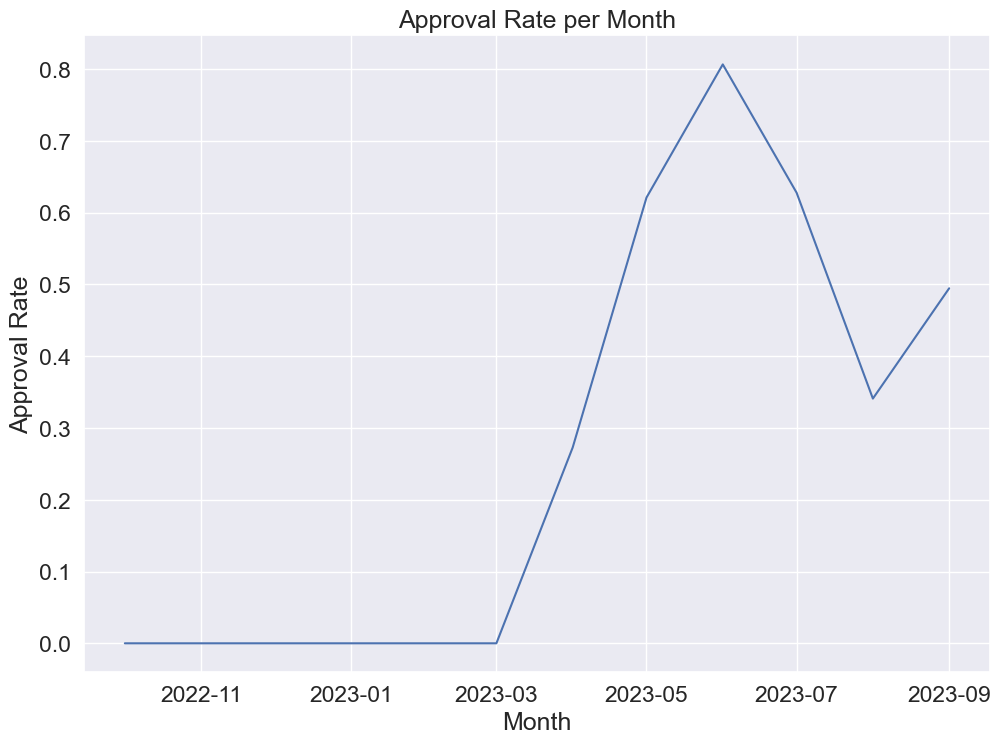

In [10]:
# Visualise the histogram distribution appeal per month
df_audit['DECISION_MONTH'] = df_audit['DECISION_DATE'].dt.month
df_audit['DECISION_YEAR'] = df_audit['DECISION_DATE'].dt.year
df_audit['DECISION_MONTH_YEAR'] = df_audit['DECISION_DATE'].dt.strftime('%Y-%m')
df_audit['DECISION_MONTH_YEAR'] = pd.to_datetime(df_audit['DECISION_MONTH_YEAR'])

# Get the approval rate per month
certified_count_per_month = df_audit[['CASE_STATUS', 'DECISION_MONTH_YEAR']][df_audit['CASE_STATUS'] == 'Certified'].groupby('DECISION_MONTH_YEAR').describe()['CASE_STATUS']['count'].rename('certified')
denied_count_per_month = df_audit[['CASE_STATUS', 'DECISION_MONTH_YEAR']][df_audit['CASE_STATUS'] == 'Denied'].groupby('DECISION_MONTH_YEAR').describe()['CASE_STATUS']['count'].rename('denied')

# Merge the approval rate per month
approval_rate_per_month = pd.merge(certified_count_per_month, denied_count_per_month, on='DECISION_MONTH_YEAR', how='outer')
approval_rate_per_month = approval_rate_per_month.fillna(0)

approval_rate_per_month['approval_rate'] = approval_rate_per_month['certified'] / (approval_rate_per_month['certified'] + approval_rate_per_month['denied'])
approval_rate_per_month = approval_rate_per_month.reset_index()
# Plot the approval rate per month
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
ax = sns.lineplot(x=approval_rate_per_month['DECISION_MONTH_YEAR'], y=approval_rate_per_month['approval_rate'])
ax.set(xlabel='Month', ylabel='Approval Rate', title='Approval Rate per Month')
plt.show()

In [11]:
# Get the approval rate per month
denied_count_per_month

DECISION_MONTH_YEAR
2022-10-01     81
2022-11-01     41
2022-12-01     87
2023-01-01     26
2023-02-01    154
2023-03-01     62
2023-04-01     64
2023-05-01     47
2023-06-01     24
2023-07-01     51
2023-08-01     58
2023-09-01    139
Name: denied, dtype: object

In [12]:
certified_count_per_month

DECISION_MONTH_YEAR
2023-04-01     24
2023-05-01     77
2023-06-01    100
2023-07-01     86
2023-08-01     30
2023-09-01    136
Name: certified, dtype: object